In [1]:
import numpy as np
import pandas as pd
import copy
DiseaseSim = pd.read_csv('data/DiseaseSim.txt',sep='\t',header=None)
DrugSim = pd.read_csv('data/DrugSim.txt',sep='\t',header=None)
DiDrA = pd.read_csv('data/DiDrA.txt',sep='\t',header=None)
#pd.set_option('display.max_row', 20) 
#pd.set_option('display.max_column', 20)

#DiDrA  # DiDrA.sum()은 열에대한 합

Rcol=[]                 # column 이름 붙이기
for i in range(1,594):
    a='r'+str(i)
    Rcol.append(a)
DrugSim.columns=Rcol
DrugSim.index=Rcol


Dcol=[]                       #index 이름 붙이기
for i in range(1,314):
    a='d'+str(i)
    Dcol.append(a)
DiseaseSim.columns=Dcol
DiseaseSim.index=Dcol


DiDrA.columns=Rcol
DiDrA.index=Dcol


d = pd.DataFrame(np.zeros((313, 593)))
d.columns=Rcol
d.index=Dcol



for i in range(0,313):       #val dataframe 생성
    for j in range(0,593):
        d.iloc[i,j] = np.random.choice([0,1], replace=True, p=[0.9,0.1])
        


valDiDr=DiDrA.mul(d)
trainDiDr=DiDrA.sub(valDiDr)

tmpdata1=pd.concat([DrugSim,trainDiDr])


TDiDrA=pd.DataFrame.transpose(trainDiDr)
tmpdata2=pd.concat([TDiDrA,DiseaseSim])


FData = pd.concat([tmpdata1,tmpdata2],axis=1)                  ###  train data set


Y = pd.DataFrame(np.zeros((906, 906)))
U, s, V = np.linalg.svd(Y, full_matrices = True)


DD= pd.DataFrame(1,index=Dcol,columns=Dcol)
RR = pd.DataFrame(1,index=Rcol,columns=Rcol)
tmpdata1=pd.concat([RR,DiDrA])
TDiDrA=pd.DataFrame.transpose(DiDrA)
tmpdata2=pd.concat([TDiDrA,DD])

Omega= copy.deepcopy(FData)
Omega[Omega>0]=1 #          데이터가 존재하는 인덱스는 1 그 외는 0


m=DiDrA.shape[0]
n=DiDrA.shape[1]
tau = np.linalg.norm(FData, ord=2)*(m+n)/np.sqrt(Omega.sum().sum())
delta = (m+n)/np.sqrt(Omega.sum().sum())



tmpdata1=pd.concat([DrugSim,DiDrA])
TDiDrA=pd.DataFrame.transpose(DiDrA)
tmpdata2=pd.concat([TDiDrA,DiseaseSim])
RealData = pd.concat([tmpdata1,tmpdata2],axis=1)                                  ## 원래 데이터 셋
RealData

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,d304,d305,d306,d307,d308,d309,d310,d311,d312,d313
r1,1.00000,0.53282,0.86400,0.66606,0.55278,0.55172,0.32159,0.64384,0.21617,0.40470,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
r2,0.53282,1.00000,0.49826,0.66535,0.65618,0.65471,0.38220,0.53600,0.17347,0.33041,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
r3,0.86400,0.49826,1.00000,0.64000,0.51910,0.52083,0.29070,0.60638,0.21672,0.44351,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
r4,0.66606,0.66535,0.64000,1.00000,0.68824,0.69020,0.30924,0.68302,0.20725,0.41816,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
r5,0.55278,0.65618,0.51910,0.68824,1.00000,0.99735,0.31796,0.62448,0.18000,0.34247,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d309,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.39255,0.056666,0.065445,0.183200,0.093899,1.00000,0.32716,0.00000,0.12728,0.11607
d310,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.46826,0.093800,0.000000,0.292720,0.141940,0.32716,1.00000,0.02697,0.15571,0.14199
d311,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.104590,0.025259,0.058476,0.054234,0.00000,0.02697,1.00000,0.18110,0.27223
d312,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.18865,0.169230,0.000000,0.084225,0.034757,0.12728,0.15571,0.18110,1.00000,0.49842




1번째
0
0.5


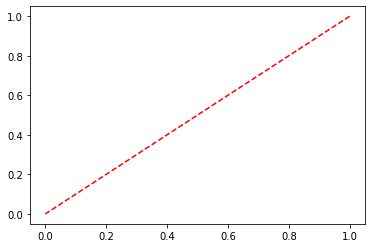



2번째
1
0.5023547880690737


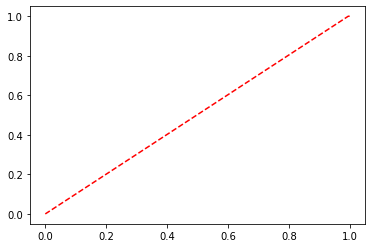



3번째
1
0.7227885688476822


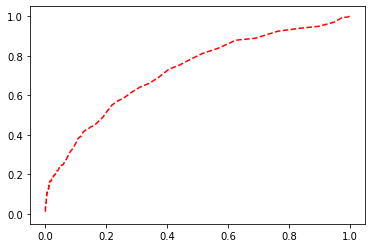



4번째
1
0.7018307363134949


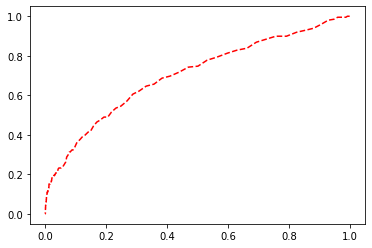



5번째
2
0.7378636688981516


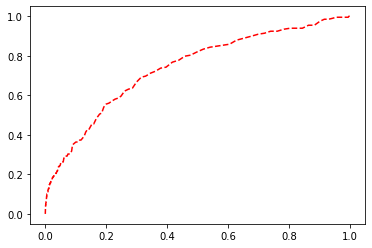



6번째
3
0.7522554074278214


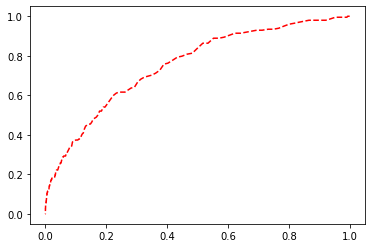



7번째
4
0.7749792626639919


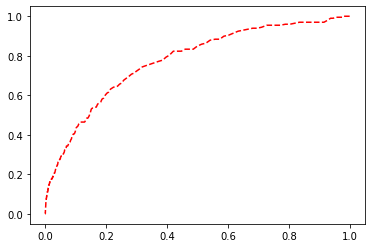



8번째
4
0.780310412083811


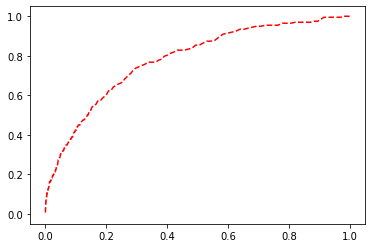



9번째
4
0.784052428141098


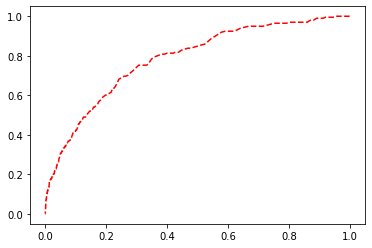



10번째
5
0.7889030783119452


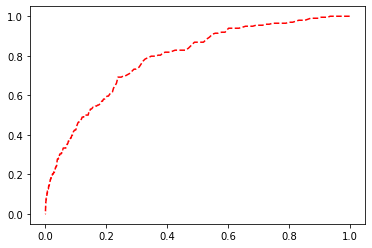



11번째
5
0.7981237427050235


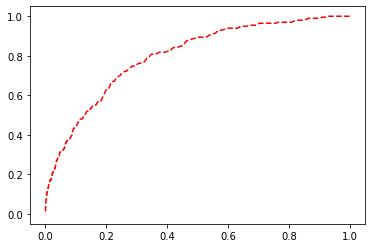



12번째
7
0.8071572652853441


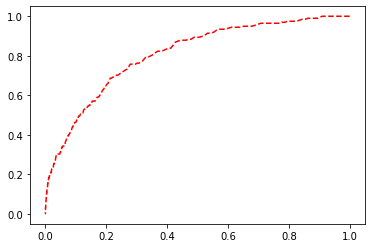



13번째
8
0.8170336778711162


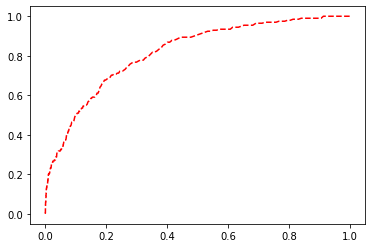



14번째
10
0.8349857586310787


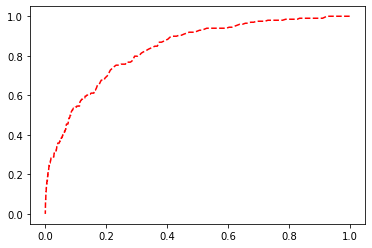



15번째
10
0.8446176155535762


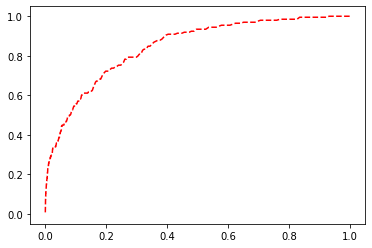



16번째
12
0.8500791764338562


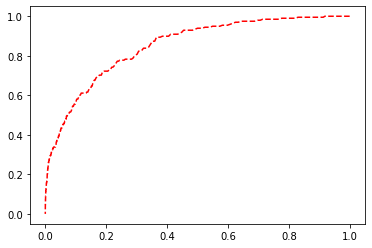



17번째
14
0.8587736838968366


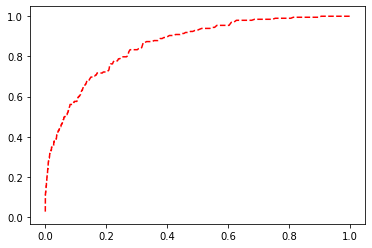



18번째
18
0.869496814078095


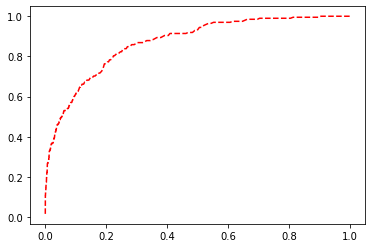



19번째
21
0.879971834405332


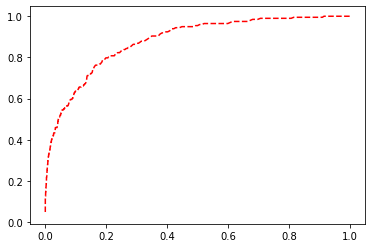



20번째
22
0.8893037723086983


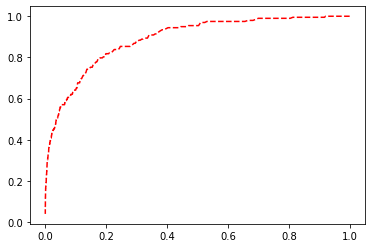



21번째
23
0.893019131935388


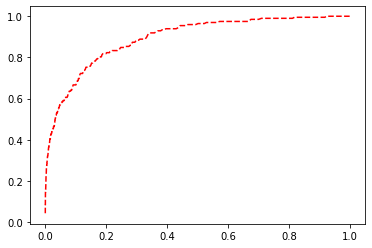



22번째
24
0.8940929076397057


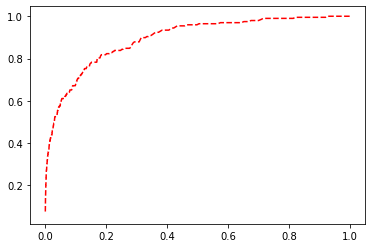



23번째
28
0.8962654750832091


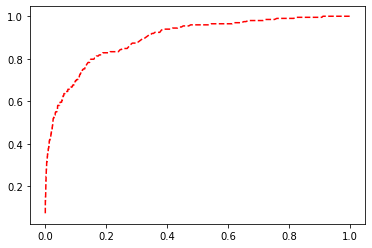



24번째
31
0.9004788315133142


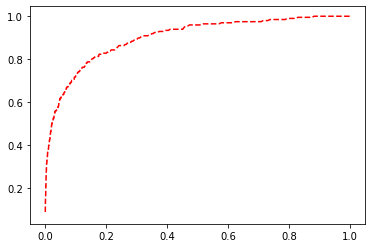



25번째
34
0.9070025486281643


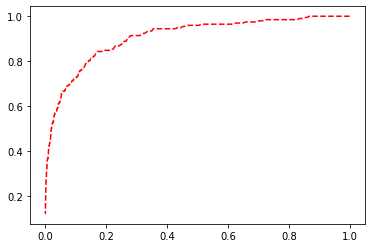



26번째
36
0.9104579055317971


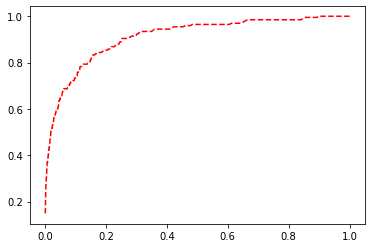



27번째
39
0.9131433700399217


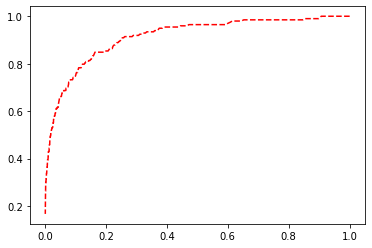



28번째
41
0.9147668150131203


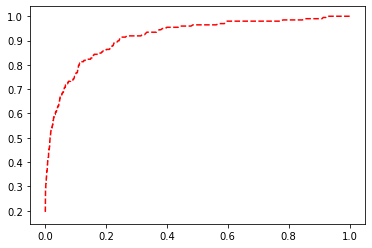

In [4]:
import matplotlib.pyplot as plt
# sklearn package rSVD version
from sklearn import metrics
from sklearn.utils.extmath import randomized_svd
def AUC(new,valDiDr):                                 #### TPR : P  먼저 구하기 P = TP + FN     여기서는 P를 실제 1 이라고 하자
    Tpr_l=[]                                          #### FPR : P그대로 사용   여기서 FP 는 0 인데 1 로 예측
    Fpr_l=[]
    P = valDiDr.sum().sum()
    epsilon = (-1)*new.min().min()+0.001
    N = d.sub(valDiDr).sum().sum()
    TPtestMatrix = new.add(epsilon).mul(valDiDr)
    TPtestMatrix[TPtestMatrix>1]=1
    FPtestMatrix = new.add(epsilon).mul(d.sub(valDiDr))
    FPtestMatrix[FPtestMatrix>1]=1
    for i in np.arange(0, 1, 0.001):
        TP = (TPtestMatrix>i).sum().sum()
        FP = (FPtestMatrix>i).sum().sum()
        TPR=TP/P  #new.mul(valDiDr).sum().sum()/valDiDr.sum().sum()           0.5이상을 1로 처리
        FPR=FP/N
        Tpr_l.append(TPR)
        Fpr_l.append(FPR)
    return metrics.auc(Fpr_l, Tpr_l),Tpr_l,Fpr_l
    
    
    



def mySVT(tau  , delta   ,Omega,Y2):
    
    Y=Y2
    U, s, V = randomized_svd(Y.values, n_components = 90,n_oversamples = 10 ,n_iter=4 )    #U, s, V = np.linalg.svd(Y)  or U,s,V = rSVD(Y,320,1,0)
    S=np.zeros([90,90])        #rSVD 로 고칠시 S모양 바꿔야함     S=np.zeros(Y.shape) 여기서  S=np.zeros([320,320])  여기로 위에 r이랑 같아야함
        
    for i in range(len(s)):
        S[i][i] = max(s[i]-tau,0)
    Z=U@S@V
    Y = Y + delta*Omega.mul(FData.sub(Z))
    Z=K.add(Z)
    return Z,S,Y


Y = pd.DataFrame(np.zeros((906, 906)))
Y.columns = Rcol+Dcol
Y.index = Rcol+Dcol
    
K = pd.DataFrame(np.zeros((906, 906)))
K.columns = Rcol+Dcol
K.index = Rcol+Dcol

bestr=0
maxauc=0
i=0
A=FData
while True:
    
    i+=1
    Z,S,Y=mySVT(tau,delta,Omega,Y)
    new=Z.iloc[593:906,0:593]
    r=(np.diag(S)>0).sum()
    auc,Tpr_l,Fpr_l = AUC(new,valDiDr)
    if(auc>maxauc):
        maxauc=auc
        bestr=r
    print("\n\n"+str(i)+"번째")
    print(r)
    print(auc)
    
    plt.plot(Fpr_l,Tpr_l,'r--')

    plt.show()
    if(r>=40): break